## Multivariate Linear Model - MultivariateLS

This notebooks illustrates some features for the multivariate linear model estimated by least squares. 
The example is based on the UCLA stats example in https://stats.oarc.ucla.edu/stata/dae/multivariate-regression-analysis/ .

The model assumes that a multivariate dependent variable depends linearly on the same set of explanatory variables.

Y = X * B + u

where  
- the dependent variable (endog) `Y` has shape (nobs, k_endog),  
- the matrix of explanatory variables including constant (exog) `X` has shape (nobs, k_exog), and
- the parameter matrix `B` has shape (k_exog, k_endog), i.e. coefficients for explanatory variables in rows and dependent variables in columns.
- the disturbance term `u` has the same shape as `Y`, (nobs, k_endog), and is assumed to have mean zero and to be uncorrelated with the exog `X`.

Estimation is by least squares. The parameter estimates with common explanatory variables for each dependent variables corresponds to separate OLS estimates for each `endog`. The main advantage of the multivariate model is that we can make inference 

In [1]:
import os
import numpy as np

import pandas as pd

from statsmodels.base.model import LikelihoodModel
from statsmodels.regression.linear_model import OLS
from statsmodels.multivariate.manova import MANOVA
from statsmodels.multivariate.multivariate_ols import MultivariateLS

import statsmodels.multivariate.tests.results as path

dir_path = os.path.dirname(os.path.abspath(path.__file__))
csv_path = os.path.join(dir_path, "mvreg.csv")
data_mvreg = pd.read_csv(csv_path)

In [2]:
data_mvreg.head()

,locus_of_control,self_concept,motivation,read,write,science,prog
0,-1.143955,0.722641,0.368973,37.405548,39.032845,33.532822,academic
1,0.504134,0.111364,0.520319,52.760784,51.995041,65.225044,academic
2,1.628546,0.629934,0.436838,59.771915,54.651653,64.604500,academic
3,0.368096,-0.138528,-0.004324,42.854324,41.121357,48.493809,vocational
4,-0.280190,-0.452226,1.256924,54.756279,49.947208,50.381657,academic


In [3]:
formula = "locus_of_control + self_concept + motivation ~ read + write + science + prog"
mod = MultivariateLS.from_formula(formula, data=data_mvreg)
res = mod.fit()

### Multivariate hypothesis tests mv_test

The `mv_test` method by default performs the hypothesis tests that each term in the formula has no effect on any of the dependent variables (`endog`). This is the same as the MANOVA test.  
Note, MANOVA in statsmodels is implemented as test on coefficients in the multivariate model and is not restricted to categorical variables. In the current example, we have three continuous and one categorical explanatory variables, in addition to the constant.

Consequently, using mv_test in MultivariateLS and in MANOVA produces the same results.
However. MANOVA only provides the hypothesis tests as feature, while MultivariateLS provide the usual model results.

More general versions of the mv_test are for hypothesis in the form `L B M = C`.
Here `L` are restrictions corresponding to explanatory variables, `M` are restrictions corresponding to dependent (endog) variables and `C` is a matrix of constants for affine restrictions. See docstrings for details.

In [4]:
mvt = res.mv_test()
mvt.summary_frame

Value Num DF      Den DF    F Value  \
Effect    Statistic                                                        
Intercept Wilks' lambda           0.848467      3       592.0  35.242876   
          Pillai's trace          0.151533    3.0       592.0  35.242876   
          Hotelling-Lawley trace  0.178596      3       592.0  35.242876   
          Roy's greatest root     0.178596      3         592  35.242876   
prog      Wilks' lambda           0.891438      6      1184.0  11.670765   
          Pillai's trace          0.108649    6.0      1186.0  11.354963   
          Hotelling-Lawley trace  0.121685      6  787.558061  11.996155   
          Roy's greatest root     0.120878      3         593  23.893456   
read      Wilks' lambda           0.976425      3       592.0   4.764416   
          Pillai's trace          0.023575    3.0       592.0   4.764416   
          Hotelling-Lawley trace  0.024144      3       592.0   4.764416   
          Roy's greatest root     0.024144      3         592   4.764416   
write     Wilks' lambda           0.947394      3       592.0  10.957338   
          Pillai's trace          0.052606    3.0       592.0  10.957338   
          Hotelling-Lawley trace  0.055527      3       592.0  10.957338   
          Roy's greatest root     0.055527      3         592  10.957338   
science   Wilks' lambda           0.983405      3       592.0   3.329911   
          Pillai's trace          0.016595    3.0       592.0   3.329911   
          Hotelling-Lawley trace  0.016875      3       592.0   3.329911   
          Roy's greatest root     0.016875      3         592   3.329911   

                                    Pr > F  
Effect    Statistic                         
Intercept Wilks' lambda                0.0  
          Pillai's trace               0.0  
          Hotelling-Lawley trace       0.0  
          Roy's greatest root          0.0  
prog      Wilks' lambda                0.0  
          Pillai's trace               0.0  
          Hotelling-Lawley trace       0.0  
          Roy's greatest root          0.0  
read      Wilks' lambda           0.002727  
          Pillai's trace          0.002727  
          Hotelling-Lawley trace  0.002727  
          Roy's greatest root     0.002727  
write     Wilks' lambda           0.000001  
          Pillai's trace          0.000001  
          Hotelling-Lawley trace  0.000001  
          Roy's greatest root     0.000001  
science   Wilks' lambda           0.019305  
          Pillai's trace          0.019305  
          Hotelling-Lawley trace  0.019305  
          Roy's greatest root     0.019305

In [5]:
manova = MANOVA.from_formula(formula, data=data_mvreg)
manova.mv_test().summary_frame

Value Num DF      Den DF    F Value  \
Effect    Statistic                                                        
Intercept Wilks' lambda           0.848467      3       592.0  35.242876   
          Pillai's trace          0.151533    3.0       592.0  35.242876   
          Hotelling-Lawley trace  0.178596      3       592.0  35.242876   
          Roy's greatest root     0.178596      3         592  35.242876   
prog      Wilks' lambda           0.891438      6      1184.0  11.670765   
          Pillai's trace          0.108649    6.0      1186.0  11.354963   
          Hotelling-Lawley trace  0.121685      6  787.558061  11.996155   
          Roy's greatest root     0.120878      3         593  23.893456   
read      Wilks' lambda           0.976425      3       592.0   4.764416   
          Pillai's trace          0.023575    3.0       592.0   4.764416   
          Hotelling-Lawley trace  0.024144      3       592.0   4.764416   
          Roy's greatest root     0.024144      3         592   4.764416   
write     Wilks' lambda           0.947394      3       592.0  10.957338   
          Pillai's trace          0.052606    3.0       592.0  10.957338   
          Hotelling-Lawley trace  0.055527      3       592.0  10.957338   
          Roy's greatest root     0.055527      3         592  10.957338   
science   Wilks' lambda           0.983405      3       592.0   3.329911   
          Pillai's trace          0.016595    3.0       592.0   3.329911   
          Hotelling-Lawley trace  0.016875      3       592.0   3.329911   
          Roy's greatest root     0.016875      3         592   3.329911   

                                    Pr > F  
Effect    Statistic                         
Intercept Wilks' lambda                0.0  
          Pillai's trace               0.0  
          Hotelling-Lawley trace       0.0  
          Roy's greatest root          0.0  
prog      Wilks' lambda                0.0  
          Pillai's trace               0.0  
          Hotelling-Lawley trace       0.0  
          Roy's greatest root          0.0  
read      Wilks' lambda           0.002727  
          Pillai's trace          0.002727  
          Hotelling-Lawley trace  0.002727  
          Roy's greatest root     0.002727  
write     Wilks' lambda           0.000001  
          Pillai's trace          0.000001  
          Hotelling-Lawley trace  0.000001  
          Roy's greatest root     0.000001  
science   Wilks' lambda           0.019305  
          Pillai's trace          0.019305  
          Hotelling-Lawley trace  0.019305  
          Roy's greatest root     0.019305

The core multivariate regression results are displayed by the `summary` method.

In [6]:
print(res.summary())

                                      MultivariateLS Regression Results                                       
Dep. Variable:     ['locus_of_control', 'self_concept', 'motivation']   No. Observations:                  600
Model:                                                 MultivariateLS   Df Residuals:                      594
Method:                                                 Least Squares   Df Model:                           15
Date:                                                Tue, 16 Dec 2025                                         
Time:                                                        18:36:39                                         
  locus_of_control       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.4970      0.157     -9.505      0.000      -1.806      -1.188
prog[T.general]       -0.1278      0.064     -1.998      0.046      -0.25

The the standard results attributes for the parameter estimates like `params`, `bse`, `tvalues` and `pvalues`, are two dimensional arrays or dataframes with explanatory variables (`exog`) in rows and dependend (`endog`) variables in columns.

In [7]:
res.params

,0,1,2
Intercept,-1.496970,-0.095858,-0.950513
prog[T.general],-0.127795,-0.276483,-0.360329
prog[T.vocational],0.123875,0.146876,0.259367
read,0.012505,0.001308,0.009674
write,0.012145,-0.004293,0.017535
science,0.005761,0.005306,-0.009001


In [8]:
res.bse

,0,1,2
Intercept,0.157499,0.178794,0.197563
prog[T.general],0.063955,0.072602,0.080224
prog[T.vocational],0.057607,0.065396,0.072261
read,0.003718,0.004220,0.004664
write,0.003391,0.003850,0.004254
science,0.003641,0.004133,0.004567


In [9]:
res.pvalues

,0,1,2
Intercept,4.887129e-20,0.592066,0.000002
prog[T.general],4.615006e-02,0.000155,0.000008
prog[T.vocational],3.193055e-02,0.025075,0.000359
read,8.192738e-04,0.756801,0.038481
write,3.700449e-04,0.265214,0.000043
science,1.141093e-01,0.199765,0.049209


### General MV and Wald tests 

The multivariate linear model allows for multivariate test in the `L B M` form as well as standard wald tests on linear combination of parameters.  

The multivariate tests are based on eigenvalues or trace of the matrices. Wald tests are standard test base on the flattened (stacked) parameter array and their covariance, hypothesis are of the form `R b = c` where `b` is the column stacked parameter array. The tests are asymptotically equivalent under the model assumptions but differ in small samples.

The linear restriction can be defined either as hypothesis matrices (numpy arrays) or as strings or list of strings.



In [10]:
yn = res.model.endog_names
xn = res.model.exog_names
yn, xn

(['locus_of_control', 'self_concept', 'motivation'],
 ['Intercept',
  'prog[T.general]',
  'prog[T.vocational]',
  'read',
  'write',
  'science'])

In [11]:
# test for an individual coefficient

mvt = res.mv_test(hypotheses=[("coef", ["science"], ["locus_of_control"])])
mvt.summary_frame

Value Num DF Den DF  F Value    Pr > F
Effect Statistic                                                        
coef   Wilks' lambda           0.995803      1  594.0  2.50373  0.114109
       Pillai's trace          0.004197    1.0  594.0  2.50373  0.114109
       Hotelling-Lawley trace  0.004215      1  594.0  2.50373  0.114109
       Roy's greatest root     0.004215      1    594  2.50373  0.114109

In [12]:
tt = res.t_test("ylocus_of_control_science")
tt, tt.pvalue

(<class 'statsmodels.stats.contrast.ContrastResults'>
                              Test for Constraints                             
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 c0             0.0058      0.004      1.582      0.114      -0.001       0.013
 ==============================================================================,
 array(0.11410929))

We can use either mv_test or wald_test for the joint hypothesis that an explanatory variable has no effect on any of the dependent variables, that is all coefficient for the explanatory variable are zero.

In this example, the pvalues agree at 3 decimals.

In [13]:
wt = res.wald_test(
    ["ylocus_of_control_science", "yself_concept_science", "ymotivation_science"],
    scalar=True,
)
wt

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.3411603250015216, p=0.01901163430173511, df_denom=594, df_num=3>

In [14]:
mvt = res.mv_test(hypotheses=[("science", ["science"], yn)])
mvt.summary_frame

Value Num DF Den DF   F Value    Pr > F
Effect  Statistic                                                         
science Wilks' lambda           0.983405      3  592.0  3.329911  0.019305
        Pillai's trace          0.016595    3.0  592.0  3.329911  0.019305
        Hotelling-Lawley trace  0.016875      3  592.0  3.329911  0.019305
        Roy's greatest root     0.016875      3    592  3.329911  0.019305

In [15]:
# t_test provides a vectorized results for each of the simple hypotheses

tt = res.t_test(
    ["ylocus_of_control_science", "yself_concept_science", "ymotivation_science"]
)
tt, tt.pvalue

(<class 'statsmodels.stats.contrast.ContrastResults'>
                              Test for Constraints                             
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 c0             0.0058      0.004      1.582      0.114      -0.001       0.013
 c1             0.0053      0.004      1.284      0.200      -0.003       0.013
 c2            -0.0090      0.005     -1.971      0.049      -0.018   -3.13e-05
 ==============================================================================,
 array([0.11410929, 0.19976543, 0.0492095 ]))

**Warning:** the naming pattern for the flattened parameter names used in `t_test` and `wald_test` might still change.

The current pattern is `"y{endog_name}_{exog_name}"`.

examples:

In [16]:
[f"y{endog_name}_{exog_name}" for endog_name in yn for exog_name in ["science"]]

['ylocus_of_control_science', 'yself_concept_science', 'ymotivation_science']

In [17]:
c = [
    f"y{endog_name}_{exog_name}"
    for endog_name in yn
    for exog_name in ["prog[T.general]", "prog[T.vocational]"]
]
c

['ylocus_of_control_prog[T.general]',
 'ylocus_of_control_prog[T.vocational]',
 'yself_concept_prog[T.general]',
 'yself_concept_prog[T.vocational]',
 'ymotivation_prog[T.general]',
 'ymotivation_prog[T.vocational]']

The previous restriction corresponds to the MANOVA type test that the categorical variable "prog" has no effect.

In [18]:
mant = manova.mv_test().summary_frame
mant.loc["prog"]  # ["Pr > F"].to_numpy()

,Value,Num DF,Den DF,F Value,Pr > F
Statistic,,,,,
Wilks' lambda,0.891438,6,1184.0,11.670765,0.0
Pillai's trace,0.108649,6.0,1186.0,11.354963,0.0
Hotelling-Lawley trace,0.121685,6,787.558061,11.996155,0.0
Roy's greatest root,0.120878,3,593,23.893456,0.0


In [19]:
res.wald_test(c, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=12.046814522691747, p=8.548081236477388e-13, df_denom=594, df_num=6>

**Note:** The degrees of freedom differ across hypothesis test methods.
The model can be considered as a multivariate model with nobs=600 in this case, or as a stacked model with 
nobs_total = nobs * k_endog = 1800.


For within endog restriction, inference is based on the same covariance of the parameter estimates in MultivariateLS and OLS. The degrees of freedom in a single output OLS are df_resid = 600 - 6 = 594. Using the same degrees of freedom in MultivariateLS preserves the equivalence for the analysis of each endog. Using the total df_resid for hypothesis tests would make them more liberal.

Asymptotic inference based on normal and chisquare distribution (`use_t=False`) is not affected by how df_resid are defined.

It is not yet decided whether there will be additional options to choose different degrees of freedom in the Wald tests.

In [20]:
res.df_resid

594

Both mv_test and wald_test can be used to test hypothesis on contrasts between coefficients

In [21]:
c = [
    f"y{endog_name}_prog[T.general] - y{endog_name}_prog[T.vocational]"
    for endog_name in yn
]
c

['ylocus_of_control_prog[T.general] - ylocus_of_control_prog[T.vocational]',
 'yself_concept_prog[T.general] - yself_concept_prog[T.vocational]',
 'ymotivation_prog[T.general] - ymotivation_prog[T.vocational]']

In [22]:
res.wald_test(c, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=23.929409268979654, p=1.2456536486105104e-14, df_denom=594, df_num=3>

In [23]:
mvt = res.mv_test(
    hypotheses=[("diff_prog", ["prog[T.general] - prog[T.vocational]"], yn)]
)
mvt.summary_frame

Value Num DF Den DF    F Value Pr > F
Effect    Statistic                                                       
diff_prog Wilks' lambda           0.892176      3  592.0  23.848839    0.0
          Pillai's trace          0.107824    3.0  592.0  23.848839    0.0
          Hotelling-Lawley trace  0.120856      3  592.0  23.848839    0.0
          Roy's greatest root     0.120856      3    592  23.848839    0.0

Example: hypothesis that coefficients are the same across endog equations.

We can test that the difference between the parameters of the later two equation with the first equation are zero.

In [24]:
mvt = res.mv_test(
    hypotheses=[
        (
            "diff_prog",
            xn,
            ["self_concept - locus_of_control", "motivation - locus_of_control"],
        )
    ]
)
mvt.summary_frame

Value Num DF     Den DF   F Value Pr > F
Effect    Statistic                                                          
diff_prog Wilks' lambda           0.867039     12     1186.0  7.307879    0.0
          Pillai's trace           0.13714   12.0     1188.0   7.28819    0.0
          Hotelling-Lawley trace   0.14853     12  919.36321  7.331042    0.0
          Roy's greatest root     0.100625      6        594  9.961898    0.0

In a similar hypothesis test, we can test that equation have the same slope coefficients but can have different constants.

In [25]:
xn[1:]

['prog[T.general]', 'prog[T.vocational]', 'read', 'write', 'science']

In [26]:
mvt = res.mv_test(
    hypotheses=[
        (
            "diff_prog",
            xn[1:],
            ["self_concept - locus_of_control", "motivation - locus_of_control"],
        )
    ]
)
mvt.summary_frame

Value Num DF     Den DF    F Value Pr > F
Effect    Statistic                                                           
diff_prog Wilks' lambda           0.879133     10     1186.0   7.890322    0.0
          Pillai's trace          0.124212   10.0     1188.0   7.866738    0.0
          Hotelling-Lawley trace  0.133679     10  886.75443   7.918284    0.0
          Roy's greatest root     0.092581      5        594  10.998679    0.0

### Prediction


The regression model and its results instance have methods for prediction and residuals.

Note, because the parameter estimates are the same as in the OLS estimate for individual endog, the predictions will also be the same between the MultivariateLS model and the set of individual OLS models.

In [27]:
res.resid

,locus_of_control,self_concept,motivation
0,-0.781981,0.759249,0.575027
1,0.334075,0.015388,0.635811
2,1.342126,0.539488,0.432337
3,0.426497,-0.326337,-0.012298
4,-0.364810,-0.480846,1.255411
...,...,...,...
595,-1.849566,0.920851,-0.318799
596,-1.278212,-1.080592,-0.031575
597,-1.060668,-1.065596,-1.577958
598,-0.661946,0.368192,0.132774


In [28]:
res.predict()

array([[-0.36197321, -0.03660735, -0.2060539 ],
       [ 0.17005867,  0.09597616, -0.11549243],
       [ 0.28641963,  0.09044546,  0.00450077],
       ...,
       [ 0.6252098 , -0.23716973,  0.11864199],
       [-0.3024846 , -0.29586741, -0.47584179],
       [ 0.77574136,  0.2878978 ,  0.42480766]], shape=(600, 3))

In [29]:
res.predict(data_mvreg)

,0,1,2
0,-0.361973,-0.036607,-0.206054
1,0.170059,0.095976,-0.115492
2,0.286420,0.090445,0.004501
3,-0.058400,0.187809,0.007974
4,0.084621,0.028620,0.001513
...,...,...,...
595,0.185458,0.036897,0.034498
596,0.330408,0.097329,0.489407
597,0.625210,-0.237170,0.118642
598,-0.302485,-0.295867,-0.475842


In [30]:
res.fittedvalues

,locus_of_control,self_concept,motivation
0,-0.361973,-0.036607,-0.206054
1,0.170059,0.095976,-0.115492
2,0.286420,0.090445,0.004501
3,-0.058400,0.187809,0.007974
4,0.084621,0.028620,0.001513
...,...,...,...
595,0.185458,0.036897,0.034498
596,0.330408,0.097329,0.489407
597,0.625210,-0.237170,0.118642
598,-0.302485,-0.295867,-0.475842


The predict methods can take user provided data for the explanatory variables, but currently are not able to automatically create sets of explanatory variables for interesting effects.

In the following, we construct at dataframe that we can use to predict the conditional expectation of the dependent variables for each level of the categorical variable "prog" at the sample means of the continuous variables. 

In [31]:
data_exog = data_mvreg[["read", "write", "science", "prog"]]

ex = pd.DataFrame(data_exog["prog"].unique(), columns=["prog"])
mean_ex = data_mvreg[["read", "write", "science"]].mean()

ex.loc[:, ["read", "write", "science"]] = mean_ex.values
ex

,prog,read,write,science
0,academic,51.901833,52.384833,51.763333
1,vocational,51.901833,52.384833,51.763333
2,general,51.901833,52.384833,51.763333


In [32]:
pred = res.predict(ex)

pred.index = ex["prog"]
pred.columns = res.fittedvalues.columns
print("predicted mean by 'prog':")
pred

predicted mean by 'prog':


,locus_of_control,self_concept,motivation
prog,,,
academic,0.086493,0.021752,0.004209
vocational,0.210368,0.168628,0.263575
general,-0.041303,-0.254731,-0.356121


## Outlier-Influence

This is currently in draft version.  
`resid_distance` is a one dimensional residual measure based on Mahalanobis distance for each sample observation. 
The hat matrix in the MultivariateLS model is the same as in OLS, the diagonal of the hat matrix is temporarily attached as `results._hat_matrix_diag`.

Note, individual components of the multivariate dependent variable can be analyzed with OLS and are available in the corresponding post-estimation methods like `OLSInfluence`.

In [33]:
res.resid_distance[:5]

array([3.74332128, 0.95395412, 5.15221877, 0.82580531, 4.5260778 ])

In [34]:
res.cov_resid

array([[0.36844484, 0.05748939, 0.06050103],
       [0.05748939, 0.4748153 , 0.13103368],
       [0.06050103, 0.13103368, 0.57973305]])

In [35]:
import matplotlib.pyplot as plt

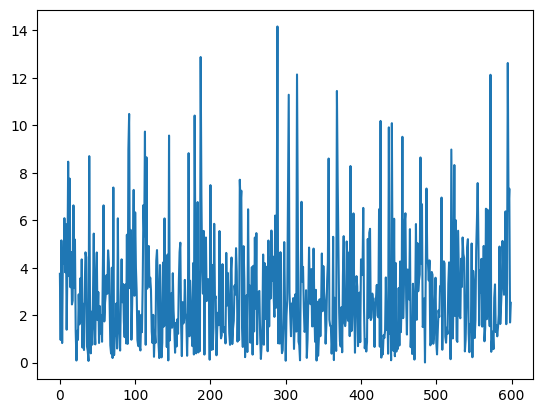

In [36]:
plt.plot(res.resid_distance)

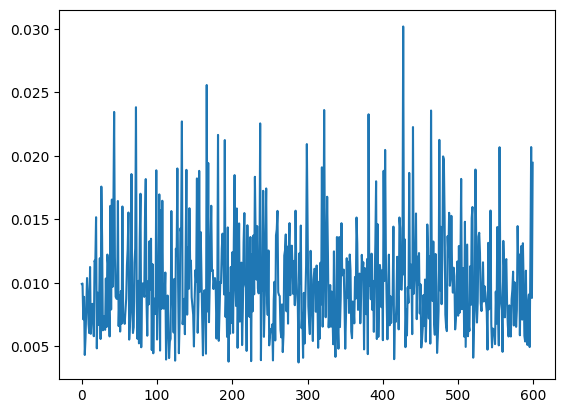

In [37]:
plt.plot(res._hat_matrix_diag)

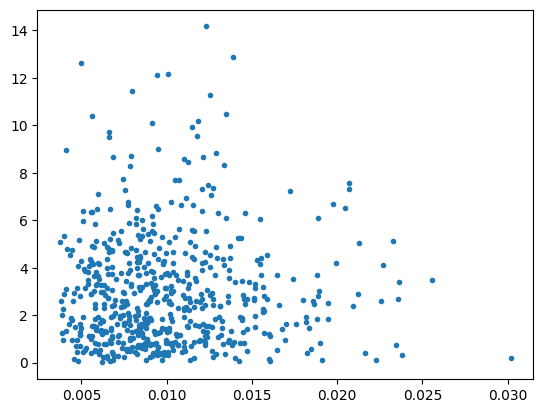

In [38]:
plt.plot(res._hat_matrix_diag, res.resid_distance, ".")